<a href="https://colab.research.google.com/github/Dorian88/Optimizacion/blob/main/NB1/Implementaci%C3%B3n_de_M%C3%A9todos_num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Métodos Numericos en python

Este notebook contiene la implementación de algunos métodos numéricos codificados en Python, también una pequeña una explicación de cada uno.

Los métodos son los siguientes:



1. Bisección
2. Falsa Posición
3. Razón Dorada
4. Interpolación Cuadrática
5. Newton
6. Newton - Raphson
7. Búsqueda Aleatoria



# Método de Bisección

Este método es un algoritmo cerrado para encontrar raices de una función continua en un intervalo \([xl, xu]).

### Raiz
la aproximación a las raiz se determina calculando el punto medio del intervalo dado y se hace mediante la siguiente ecuación:

$$
xr = \frac{xl + xu}{2}
$$

### Pasos del algoritmo
1. Elegir un intervalo \([xl, xu]) donde \(f(xl)f(xu) < 0\).
2. Calcular el punto medio \(xr\).
3. Evaluar \(xr\) y elegir el subintervalo correcto de la siguiente manera.<br>3.1. Si f(xl)f(xr) < 0 entonces se debe hacer xu = xr y volver al paso 2<br>
3.2. Si f(xl)f(xr) > 0 entonces se debe hacer xl = xr y volver al paso 2<br>3.3 Si f(xl)f(xr) = 0 la raíz es igual a xr y termina el método
4. Repetir hasta cumplir la tolerancia.

# Código en Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Definir la funcion
def crearFuncion(expr):
    def f(x):
        return eval(expr, {"__builtins__": {}}, {"x": x, "np": np})

    return f

#Metodo de la biseccion
def biseccion(f, a, b, tol = 1e-6, max_iter = 100):

    if f(a)*f(b) >= 0:
        raise ValueError("La funcion no cambia de signo en el intervalo dado")

    # Listas para guardar datos de la grafica
    iteraciones = []
    errores = []
    aproximaciones = []

    # encabezado de la tabla
    print(f"{'iter':<5}{'a':<12}{'b':<12}{'c':<12}{'f(a)':<12}{'f(b)':<12}{'f(c)':<12}{'f(a)f(b)':<12}{'f(a)f(c)':<12}{'Error':<12}")

    for i in range (max_iter):
        c = (a + b) / 2 #Punto medio
        fa, fb, fc = f(a), f(b), f(c)
        error = abs(fc)

        # Guardar datos para graficar
        iteraciones.append(i+1)
        errores.append(error)
        aproximaciones.append(c)

        # Muestra la fila de la tabla
        print(f"{i+1:<5}{a:<12.6f}{b:<12.6f}{c:<12.6f}{fa:<12.6f}{fb:<12.6f}{fc:<12.6f}{fa*fb:<12.6f}{fa*fc:<12.6f}{error:<12.6f}")

        #Si se encuentra la raiz o se alcanza la tolerancia
        if error < tol or (b - a) / 2 < tol:
            print (f"\nraiz aproximada: ", c)
            return c, iteraciones, errores, aproximaciones

        # Elegir el nuevo intervalo
        if f(a)*fc < 0:
            b = c
        else:
            a = c

    print("\nSe alcanzo el numero maximo de iteraciones")
    return (a + b) / 2

#Se llama el metodo
expr = input("Ingrese la funcion f(x): ")
f = crearFuncion(expr)

a = float(input("Ingrese el limite inferior del intervalo: "))
b = float(input("Ingrese el limite superior del intervalo: "))

raiz, iteraciones, errores, aproximaciones = biseccion(f, a, b, tol = 1e-6)

Ingrese la funcion f(x): 3*x**2 - 120*x + 100
Ingrese el limite inferior del intervalo: -10
Ingrese el limite superior del intervalo: 20
iter a           b           c           f(a)        f(b)        f(c)        f(a)f(b)    f(a)f(c)    Error       
1    -10.000000  20.000000   5.000000    1600.000000 -1100.000000-425.000000 -1760000.000000-680000.000000425.000000  
2    -10.000000  5.000000    -2.500000   1600.000000 -425.000000 418.750000  -680000.000000670000.000000418.750000  
3    -2.500000   5.000000    1.250000    418.750000  -425.000000 -45.312500  -177968.750000-18974.60937545.312500   
4    -2.500000   1.250000    -0.625000   418.750000  -45.312500  176.171875  -18974.60937573771.972656176.171875  
5    -0.625000   1.250000    0.312500    176.171875  -45.312500  62.792969   -7982.78808611062.35504262.792969   
6    0.312500    1.250000    0.781250    62.792969   -45.312500  8.081055    -2845.306396507.433414  8.081055    
7    0.781250    1.250000    1.015625    8.081055    

Estas son las gráficas de la función y del error

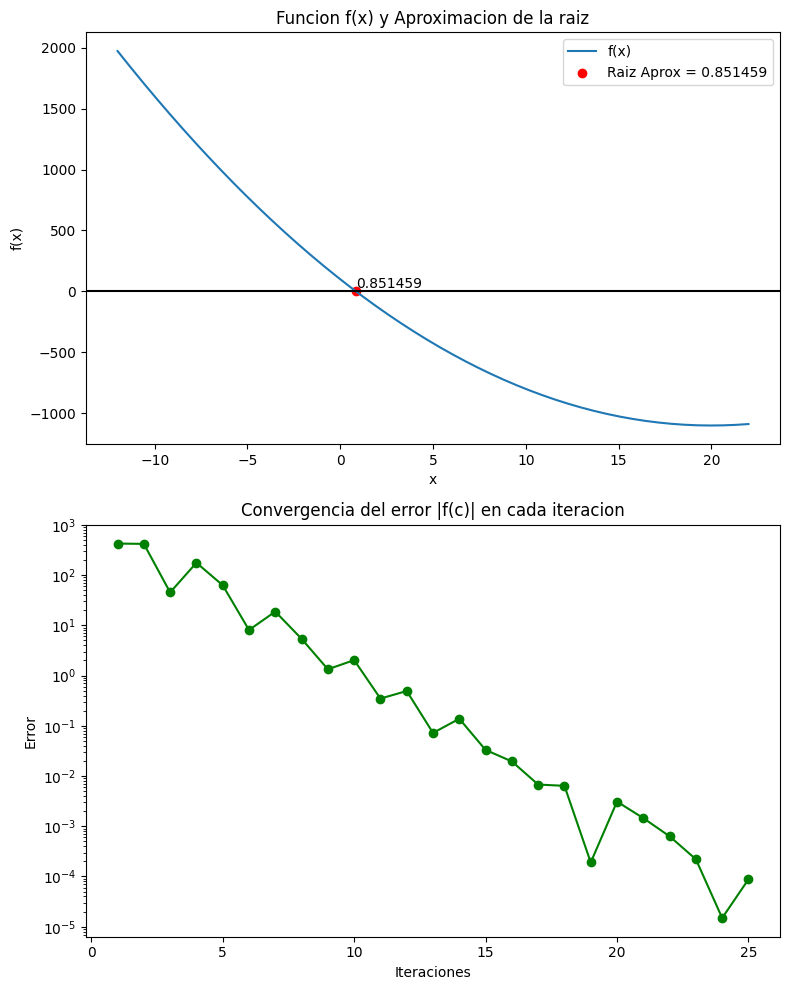

In [ ]:
#*****************************
# Graficas en la misma ventana
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))

#**********************
# Grafica de la funcion
#**********************

x = np.linspace(a - 2, b + 2)
y = f(x)

ax1.plot(x, y, label = "f(x)")
ax1.axhline(0, color = "black", linestyle = "-")
ax1.scatter(raiz, f(raiz), color = "red", label = f"Raiz Aprox = {raiz:.6f}")
ax1.text(raiz, f(raiz), f"{raiz:.6}", color = "black", fontsize = 10, ha = "left", va = "bottom")
ax1.set_title("Funcion f(x) y Aproximacion de la raiz")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.legend()

#******************
# Grafica del error
#******************
ax2.plot(iteraciones, errores, marker = "o", linestyle = "-", color = "green")
ax2.set_yscale("log") # Escala logaritmica para ver la convergencia
ax2.set_title("Convergencia del error |f(c)| en cada iteracion")
ax2.set_xlabel("Iteraciones")
ax2.set_ylabel("Error")

plt.tight_layout()
plt.show()

# Método de la Falsa Posición

Es una variante del método de Bisección que usa la intersección de la recta secante con el eje x

En este caso la raiz se calcula de la siguiente manera:

$$
x_{r} = x_{u}-\frac{f(x_{u})(x_{l}-x_{u})}{f(x_{u}-x_{l})}
$$

### Pasos del algoritmo
1. Elegir un intervalo [xl, xu] donde f(xl)f(xu) < 0.
2. Calcular el punto medio xr.
3. Evaluar xr y elegir el subintervalo correcto de la siguiente manera.<br>3.1. Si f(xl)f(xr) < 0 entonces se debe hacer xu = xr y volver al paso 2<br>
3.2. Si f(xl)f(xr) > 0 entonces se debe hacer xl = xr y volver al paso 2<br>3.3 Si f(xr) = 0 la raíz es igual a xr y termina el método
4. Repetir hasta cumplir la tolerancia.


# Código en Python

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definir la funcion
def crearFuncion(expr):
    contexto = {k: getattr(math, k) for k in dir(math) if not k.startswith("__")}
    def f(x):
        return eval(expr, {"__builtins__": {}}, {**contexto, "x": x})

    return f

#Metodo de la falsa posicion
def falsaPosicion(f, xl, xu, tol = 1e-6, max_iter = 100):
    if f(xl) * f(xu) > 0:
        raise ValueError("La funcion no cambia de signo en el intervalo dado")

    xrAnterior = None # Variable para calcular el error
    raices = []
    errores = []

    # Encabezado de la tabla
    print(f"{'Iter':<10}{'xl':<12}{'xu':<12}{'xr':<12}{'f(xl)':<12}{'f(xu)':<12}{'f(xr)':<12}{'f(xl)f(r)':<12}{'Error':<12}")

    for i in range(1, max_iter + 1):
        #Ecuacion de la falsa posicion
        xr = (xl * f(xu) - xu * f(xl)) / (f(xu) - f(xl))

        #Calcular el valor de la funcion en xr
        fxr = f(xr)

        # Calcular el error
        if xrAnterior is None:
            error = None #No hay error en la primera iteracion
        else:
            error = abs(xr - xrAnterior)

        # Guarda los datos para graficar
        raices.append(xr)
        errores.append(error if error is not None else 0)

        # Imprime la fila de la tabla
        print(f"{i:<10}{xl:<12.6f}{xu:<12.6f}{xr:<12.6f}{f(xl):<12.6f}{f(xu):<12.6f}{fxr:<12.6f}{(f(xl) * f(xu)):<15.6f}{'' if error is None else f'{error:.6f}'}")

        #Verificar la tolerancia
        if abs(fxr) < tol:
            return xr, raices, errores

        #Actualizar los xl o xu
        if f(xl) * fxr < 0:
            xu = xr
        else:
            xl = xr

        xrAnterior = xr

    return xr, raices, errores

expr = input("Ingrese la funcion (Ejemplo: x**2 - x - 2, o use funciones de math como sin(x)): ")
xl = float(input("Ingrese el valor de xl: "))
xu = float(input("Ingrese el valor de xu: "))

f= crearFuncion(expr)

raiz, raices, errores = falsaPosicion(f, xl, xu)

print(f"\nLa raiz aproximada es: {raiz:.6f}")

Estas son las gráficas de la función y del error

In [ ]:
#--------------------
#Graficas
#--------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

#Grafica de la funcion
xVals = np.linspace(xl - 1, xu + 1, 400)
yVals = [f(x) for x in xVals]
ax1.plot(xVals, yVals, label = "f(x)")
ax1.axhline(0, color = "black", linewidth = 0.8)
ax1.scatter(raices, [f(r) for r in raices], color = "red", label = "Aproximaciones")
ax1.scatter(raiz, f(raiz), color = "green", s = 100, marker = "*", label = f"Raiz ≈ {raiz:.6f}")
ax1.annotate(f"{raiz:.6f}", xy=(raiz, f(raiz)), xytext=(raiz + 0.5, f(raiz)),
             arrowprops=dict(facecolor = 'green', shrink = 0.05), fontsize = 9, color = "green")
ax1.set_title("Grafica de la Funcion")
ax1.legend()
#ax1.grid(True)

# Grafica del error
ax2.plot(range(1, len(errores) + 1), errores, marker = "o")
ax2.set_title("Grafica del Error")
ax2.set_xlabel("Iteracion")
ax2.set_ylabel("Error")
#ax2.grid(True)

plt.tight_layout()
plt.show()

# Método de la Razón Dorada

Es un método de optimización unidimensional que busca el valor máximo o mínimo de una función dentro de un intervalo .

En este método se usa el valor de la razón dorada que se calcula de la siguiente manera:

$$
\phi = \frac{(1 + \sqrt{5})}{2}=1.618
$$
<br>
Los pasos a seguir para ejecutar el método son los siguientes:
<br>
1. Calcular los puntos interiores usando la razón dorada.
2. Se evalua la función en esos puntos.
3. Se actualiza el intervalo de busqueda.
4. Repetir hasta que cumplir la tolerancia.

# Código en Python

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def razonDorada(f, xl, xu, tol = 1e-6, maxIter = 100, mode = "min"):
    phi = 0.618 # Razon Dorada

    errores = [] # Lista para graficar el error
    puntosX = [] # Puntos candidatos de cada iteracion
    puntosY = []

    # Encabezado de la tabla
    print(f"{'Iter':<5}{'xl':<12}{'xu':<12}{'d':<12}{'x1':<12}{'x2':<12}{'f(x1)':<12}{'f(x2)':<12}{'Error':<12}")

    for i in range(1, maxIter + 1):
        # Cálculo de los puntos en cada iteración
        d = phi * (xu - xl)
        x1 = xl + d
        x2 = xu - d

        f1, f2 = f(x1), f(x2)
        error = abs(x2 - x1)

        # Guardar datos para graficar
        xMid = (x1 + x2)/2
        puntosX.append(xMid)
        puntosY.append(f(xMid))
        errores.append(error)

        # Mostrar fila de la tabla
        print(f"{i:<5}{xl:<12.6}{xu:<12.6}{d:<12.6}{x1:<12.6}{x2:<12.6}{f1:<12.6}{f2:<12.6}{error:<12.6}")

        if error < tol:
            break

        # Actualizacion segun minimo o maximo
        if mode == "max": # Busqueda del minimo
            if f2 > f1:
                xu = x1
            else:
                xl = x2
        else: # Busqueda del minimo
            if f2 < f1:
                xu = x1
            else:
                xu = x1

    x_opt = (xl + xu)/2
    f_opt = f(x_opt)

    return x_opt, f_opt, errores, puntosX, puntosY

#====================
# Programa Principal
#====================
if __name__ == "__main__":
    func_str = input("Ingrese la funcion en terminos de x (Ej: 2*sin(x) - (x**2/10): ")

    # Se crea la funcion evaluable con acceso directo a math
    def f(x):
        return eval(func_str, {"x":x, **math.__dict__})

    # Intervalo de Búsqueda
    xl = float(input("Ingrese el limite inferior del intervalo: "))
    xu = float(input("Ingrese el limite superior del intervalo: "))
    mode = input("Desea buscar el 'min' (minimo) o 'max' (maximo): ").strip().lower() # Modo de busqueda

    # Ejecución del método
    x_opt, f_opt, errores, puntosX, puntosY = razonDorada(f, xl, xu, mode = mode)

    print(" \n======RESULTADO FINAL======")
    if mode == "min":
        print(f"Minimo aproximado en x ≈ {x_opt}, f(x) ≈ {f_opt}")
    else:
        print(f"Maximo aproximado en x ≈ {x_opt}, f(x) ≈ {f_opt}")


Las graficas de la función y del error se muestran a continuación

In [ ]:
#*********
    # Graficas
    #*********
    fig, axs = plt.subplots(2, 1, figsize = (8, 10))

    # Grafica de la funcion
    margen = (xu - xl) * 2
    X = np.linspace(xl - margen, xu + margen, 800)
    Y = [f(x) for x in X]

    axs[0].plot(X, Y, label = "f(x)")
    axs[0].scatter(x_opt, f_opt, color="green", marker="*", s=200,
                   zorder=5, label=f"Optimo ≈ {x_opt:.4f}")
    axs[0].annotate(f"{f_opt:.4f}", (x_opt, f_opt), textcoords="offset points",
                    xytext=(0, 10), ha="center", color="green")
    #axs[0].scatter(x_opt, f_opt, color = "red", zorder = 5, label=f"Optimo ({x_opt:.4f}, {f_opt:.4f})")
    #axs[0].annotate(f"{f_opt:.4f}", (x_opt, f_opt), textcoords="offset points", xytext=(0, 10), ha="center", color="red")
    axs[0].set_title("Funcion")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("f(x)")
    axs[0].legend()

    # Grafica del error
    axs[1].plot(range(1, len(errores) + 1), errores, marker = "o")
    axs[1].set_title("Error")
    axs[1].set_xlabel("Iteracion")
    axs[1].set_ylabel("error")

    plt.tight_layout()
    plt.show()

# Interpolación Cuadrática

Se aproxima el óptimo de una función ajustando una parábola a tres puntos y buscando el vértice.

El valor máximo del ajuste cuadrático para los valores iniciales esta dado por la siguiente ecuación:

$$
 x_{3} = \frac{f(x_{0})(x_{1}^{2} - x_{2}^{2}) + f(x_{1})(x_{2}^{2} - x_{0}^{2}) + f(x_{2})(x_{0}^{2} - x_{1}^{2})}{2(f(x_{0})(x_{1} - x_{2}) + f(x_{1})(x_{2} - x_{0}) + f(x_{2})(x_{0} - x_{1}))}
$$

# Código en Python

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#Evaluador de la funcion ingresada
def crearFuncion(expr):
    # Diccionario con todas las funciones y constantes de math
    contexto = {k: getattr(math, k) for k in dir(math) if not k.startswith("__")}
    def f(x):
        return eval(expr, {"__builtins__": {}}, {**contexto, "x":x})
    return f

def interpolacionCuadratica(f, x0, x1, x2, objetivo = "max", tol = 1e-6, maxIter = 100):

    print(f"{'iter':<6}{'x0':<10}{'f(x0)':<12}{'x1':<10}{'f(x1)':<12}"
          f"{'x2':<10}{'f(x2)':<12}{'x3':<10}{'f(x3)':<12}"
          f"{'error 1':<12}{'error 2':<12}{'error 3':<12}")

    errores = []
    aproximaciones = [x0, x1, x2]

    for it in range(1, maxIter + 1):
        f0, f1, f2 = f(x0), f(x1), f(x2)

        numerador = (f0 * (x1**2 - x2**2) +
                     f1 * (x2**2 - x0**2) +
                     f2 * (x0**2 - x1**2))
        denominador = (2 * (f0 * (x1 - x2) +
                            f1 * (x2 - x0) +
                            f2 * (x0 - x1)))

        if denominador == 0:
            print("El denominador es cero, no se puede continuar")
            return None, None

        x3 = numerador / denominador
        f3 = f(x3)

        # Calculo de errores
        e1 = abs(x3 - x0)
        e2 = abs(x3 - x1)
        e3 = abs(x3 - x2)
        maxError = max(e1, e2, e3)

        errores.append(maxError)
        aproximaciones.append(x3)

        # Muestra la fila de la tabla
        print(f"{it:<6}{x0:<10.6f}{f0:<12.6f}{x1:<10.6f}{f1:<12.6f}"
              f"{x2:<10.6f}{f2:<12.6f}{x3:<10.6f}{f3:<12.6f}"
              f"{e1:<12.6f}{e2:<12.6f}{e3:<12.6f}")

        # Verifica la convergencia
        if maxError < tol:
            return x3, f3, errores, aproximaciones

        # Actualiza los puntos segun objetivo (max o min)
        if objetivo == "max":
            if f3 > f1:
                if x3 > x1:
                    x0 = x1
                    x1 = x3
                else:
                    x2 = x1
                    x1 = x3
            else:
                if x3 > x1:
                    x2 = x3
                else:
                    x0 = x3
        else: # Objetivo = "min"
            if f3 < f1:
                if x3 > x1:
                    x0 = x1
                    x1 = x3
                else:
                    x2 = x1
                    x1 = x3
            else:
                if x3 > x1:
                    x2 = x3
                else:
                    x0 = x3

    return x1, f(x1), errores, aproximaciones

Código para las gráficas

In [ ]:
def graficar(f, aproximaciones, errores, xOpt, fOpt):
    fig, axs = plt.subplots(2, 1, figsize = (8, 8))

    # Definir rango dinamico segun las aproximaciones
    xmin, xmax = min(aproximaciones), max(aproximaciones)
    margen = 0.2 * (xmax - xmin if xmax != min else 1)
    xs = np.linspace(xmin - margen, xmax + margen, 400)
    ys = [f(x) for x in xs]

    # Grafica de la funcion
    axs[0].plot(xs, ys, label = "f(x)")
    axs[0].axhline(0, color = "black", linewidth = 0.8)
    axs[0].scatter(aproximaciones, [f(x) for x in aproximaciones], color = "red", label = "Aproximaciones")
    axs[0].scatter(xOpt, fOpt, color = "green", marker = "*", s = 200, label = f"Optimo ≈ {xOpt:.6f}")
    axs[0].set_title("Funcion")
    axs[0].legend()

    # Grafica del error
    axs[1].plot(range(1, len(errores) + 1), errores, marker = "o")
    axs[1].set_title("Error")
    axs[1].set_xlabel("Iteracion")
    axs[1].set_ylabel("Error maximo")

    plt.tight_layout()
    plt.show()

In [ ]:
# ******************
# Programa principal
# ******************
if __name__ == "__main__":
    # entrada de la funcion
    expr = input("Ingrese la funcion enterminos de x (ejemplo: 2*sin(x) - x**2/10: ")
    f = crearFuncion(expr)

    # Pregunta si busca maximo o minimo
    objetivo = input("Desea hallar el minimo (min) o el maximo (max)?: ").strip().lower()

    # Puntos iniciales
    x0 = float(input("Ingrese x0: "))
    x1 = float(input("Ingrese x1: "))
    x2 = float(input("Ingrese x2: "))

    # ejecuta el metodo
    xOpt, fOpt, errores, aproximaciones = interpolacionCuadratica(f, x0, x1, x2, objetivo = objetivo)

    print(f"\nEl optimo aproximado en x = {xOpt:.6f}")
    print(f"f(x) = {fOpt:.6f}")

    graficar(f, aproximaciones, errores, xOpt, fOpt)

# Método de Newton

Este método usa las derivadas para hallar las raices de una función

La ecuación es la siguiente:

$$
x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}
$$

# Código en Python

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def crearFuncion(expr):
    contexto = {k: getattr(math, k) for k in dir(math) if not k.startswith("__")}
    def f(x):
        return eval(expr, {"__builtins__": {}}, {**contexto, "x": x})
    return f

# *****************
# Derivada numerica
# *****************
def derivada(f, x, h = 1e-6):
    return (f(x + h) - f(x - h)) / (2*h)

# ****************
# Metodo de Newton
# ****************
def metodoNewton(f, x0, tol=1e-6, maxIter = 50):
    print("{:<10}{:<15}{:<15}{:<15}{:<15}".format("iter", "x", "f(x)", "f'(x)", "Error"))
    errores, aproximaciones = [], [x0]

    for i in range(maxIter):
        fx = f(x0)
        fpx = derivada(f, x0)
        if fpx == 0:
            print("Derivada nula. No se puede continuar.")
            break
        x1 = x0 - (fx/fpx)
        error = abs(x1 - x0)
        errores.append(error)
        print("{:<10}{:<15.6f}{:<15.6f}{:<15.6f}{:<15.6f}".format(i + 1, x0, fx, fpx, error))
        aproximaciones.append(x1)

        if error < tol:
            break
        x0 = x1

    return aproximaciones, errores


Este es el código para las gráficas de la función y el error

In [ ]:
def graficar(f, aproximaciones, errores):
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    # Grafica de la funcion
    xVals = np.linspace(-10, 20, 400)
    yVals = [f(x) for x in xVals]
    axs[0].plot(xVals, yVals, label = "f(x)")
    axs[0].axhline(0, color = "black", linewidth = 0.8)
    axs[0].scatter(aproximaciones, [f(x) for x in aproximaciones], color = "red", label = "Aproximaciones")
    xOpt = aproximaciones[-1]
    yOpt = f(xOpt)
    axs[0].scatter([xOpt], [yOpt], color="green", s=100, zorder=5, label="Óptimo")
    axs[0].annotate(f"({xOpt:.4f}, {yOpt:.4f})", (xOpt, yOpt),
                    textcoords="offset points", xytext=(10, 10), fontsize=9, color="green")
    axs[0].set_title("Metodo de Newton")
    axs[0].legend()

    # Grafica del error
    axs[1].plot(range(1, len(errores)+1), errores, "ro-")
    axs[1].set_title("Errores")
    axs[1].set_xlabel("Iteracion")
    axs[1].set_ylabel("Error")

    plt.tight_layout()
    plt.show()

In [ ]:
# *****************
# Funcion principal
# *****************
if __name__=="__main__":
    expr = input("Ingrese la funcion (Ejemplo: x**3 - 2*x - 5 o 2*sin(x) - x**2/10): ")
    f = crearFuncion(expr)
    x0 = float(input("Ingrese el valor inicial x0: "))

    aproximaciones, errores = metodoNewton(f, x0)
    graficar(f, aproximaciones, errores)

# Método de Newton - Raphson

Este método usa la primera y la segunda derivada para encontrar el óptimo de una función.

La ecuación para cumplir este próposito es la siguiente:

$$
x_{i+1} = x_{i} - \frac{f'(x_{i})}{f''(x_{i})}
$$



# Código en Pyhton

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# ***********************
# Evaluador de la funcion
# ***********************
def crearFuncion(expr):
    contexto = {k: getattr(math, k) for k in dir(math) if not k.startswith("__")}
    def f(x):
        return eval(expr, {"__builtins__":{}}, {**contexto, "x": x})
    return f

# *******************
# Derivadas numericas
# *******************
def derivada(f, x, h = 1e-6):
    return (f(x + h) - f(x - h))/(2*h)

def segundaDerivada(f, x, h = 1e-6):
    return (f(x + h) - 2*f(x) + f(x-h)) / (h**2)

# ************************
# Metodo de Newton-Raphson
# ************************
def metodoNewtonRaphson(f, x0, tol = 1e-6, maxIter = 50):
    print("{:<10}{:<15}{:<15}{:<15}{:<15}{:<15}".format("Iter", "x", "f(x)", "f'(x)", "f''(x)", "Error"))
    errores, aproximaciones = [], [x0]

    for i in range(maxIter):
        fx0 = f(x0)
        fpx = derivada(f, x0)
        fppx = segundaDerivada(f, x0)

        if fppx == 0:
            print("Segunda derivada nula, no se puede continuar")
            break

        x1 = x0 - fpx / fppx
        error = abs(x1 - x0)
        errores.append(error)
        print("{:<10}{:<15.6f}{:<15.6f}{:<15.6f}{:<15.6f}{:<15.6f}".format(
            i + 1, x0, fx0, fpx, fppx, error))
        aproximaciones.append(x1)

        if error < tol:
            break
        x0 = x1

    return aproximaciones, errores

El código para las gráficas de la función y del error

In [ ]:
def graficar(f, aproximaciones, errores):
    fig, axs = plt.subplots(2, 1, figsize = (8, 8))

    # Grafica de la funcion
    xVals = np.linspace(-10, 20, 400)
    yVals = [f(x) for x in xVals]
    axs[0].plot(xVals, yVals, label="f(x)")
    axs[0].axhline(0, color="black", linewidth=0.8)
    axs[0].scatter(aproximaciones, [f(x) for x in aproximaciones], color="blue", label="Aproximaciones")
    xOpt = aproximaciones[-1]
    yOpt = f(xOpt)
    axs[0].scatter([xOpt], [yOpt], color="green", s=100, zorder=5, label="Óptimo")
    axs[0].annotate(f"({xOpt:.4f}, {yOpt:.4f})", (xOpt, yOpt),
                    textcoords="offset points", xytext=(10, 10), fontsize=9, color="green")
    axs[0].set_title("Funcion")
    axs[0].legend()

    # Grafica del error
    axs[1].plot(range(1, len(errores) + 1), errores, "bs-")
    axs[1].set_title("Errores")
    axs[1].set_xlabel("Iteracion")
    axs[1].set_ylabel("Error")

    plt.tight_layout()
    plt.show()

In [ ]:
# ******************
# Programa principal
# ******************
if __name__ == "__main__":
    expr = input("Ingrese la funcion (Ejemplo: 2*sin(x) - x**2/10): ")
    f = crearFuncion(expr)
    x0 = float(input("Ingrese el valor inicial x0: "))

    aproximaciones, errores = metodoNewtonRaphson(f, x0)
    graficar(f, aproximaciones, errores)

# Método de Búsqueda Aleatoria

Es un método estocástico de optimización en el que se prueban puntos aleatorios en un dominio dado.

Los pasos que se desarrolla son los siguientes:
1. Generar puntos aleatorios en el dominio.
2. Evaluar la función en cada punto.
3. Guardar el mejor valor encontrado.
4. Repetir por varias iteraciones.

Las ecuaciones son las siguientes:

Para x:
$$
x = x_{l} + (x_{u} - x_{l})r
$$

Para y:
$$
x = y_{l} + (y_{u} - y_{l})r
$$

r es el número generado aleatoriamente

# Código en Python

In [ ]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as slt
from PIL.ImageChops import offset
from mpl_toolkits.mplot3d import Axes3D

# =======================
# Evaluador de la funcion
# =======================
def crearFuncion(expr):
    contexto = {k: getattr(math, k) for k in dir(math) if not k.startswith("__")}
    def f(x, y):
        return eval(expr, {"__builtins__":{}}, {**contexto, "x":x, "y":y})
    return f

# ===============================
# Metodo de la busqueda aleatoria
# ===============================
def busquedaAleatoria(expr, xl, xu, yl, yu, nIter, modo = "max"):
    f = crearFuncion(expr)

    if modo == "max":
        mejor = float("-inf")
    else:
        mejor = float("inf")

    mejorx, mejory = None, None

    print(f"{'iter':<10}{'x':<15}{'y':<15}{'f(x, y):<15'}")

    xs, ys, fs = [], [], []

    for i in range(nIter + 1):
        x = xl + (xu - xl) * random.random()
        y = yl + (yu - yl) * random.random()
        val = f(x, y)

        xs.append(x)
        ys.append(y)
        fs.append(val)

        print(f"{i:<10}{x:<15.6}{y:<15.6}{val:<15.6}")

        if modo == "max":
            if val > mejor:
                mejor, mejorx, mejory = val, x, y
            else: # Modo "min"
                if val < mejor:
                    mejor, mejorx, mejory = val, x, y

    return mejorx, mejory, mejor, xs, ys, fs


Para graficar

In [ ]:
def graficar(expr, xl, xu, yl, yu, xs, ys, fs, mejorx, mejory, mejor, modo):
    f = crearFuncion(expr)

    X = np.linspace(xl, xu, 100)
    Y = np.linspace(yl, yu, 100)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")

    # Superficie
    ax.plot_surface(X, Y, Z, cmap = "viridis", alpha=0.7)

    # Aproximaciones
    ax.scatter(xs, ys, fs, color = "red", label = "Aproximaciones")

    # Optimo encontrado
    opt_label = "Maximo" if modo == "max" else "Minimo"
    ax.scatter(mejorx, mejory, mejor, color = "green", s = 100, marker = "*", label = f"{opt_label} ≈ {mejor:.4f}")

    # Etiqueta del optimo en la grafica
    offset_z = (max(Z.flatten()) - min(Z.flatten())) * 0.3
    ax.text(mejorx, mejory, mejor + offset_z, f"{opt_label}\n({mejorx:.2f}, {mejory:.2f}, {mejor:.2f})",
            color = "black", fontsize = 10, ha = "center", va = "bottom", backgroundcolor = "white")
    ax.plot([mejorx, mejorx], [mejory, mejory], [mejor, mejor + 2], color = "black", linestyle = "--")

    ax.set_title("Funcion")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.legend()
    plt.show()

In [ ]:
# ==================
# Programa Principal
# ==================
if __name__ == "__main__":
    expr = input("ingrese la funcion f(x, y): ")
    xl = float(input("ingrese el limite inferior de x: "))
    xu = float(input("ingrese el limite superior de x: "))
    yl = float(input("ingrese el limite inferior de y: "))
    yu = float(input("ingrese el limite superior de y: "))
    nIter = int(input("ingrese el numero de iteraciones: "))
    modo = input("Desea maximizar o minimizar? (max/min): ").strip().lower()

    mejorx, mejory, mejor, xs, ys, fs = busquedaAleatoria(expr, xl, xu, yl, yu, nIter, modo)
    print(f"\n{('Maximo' if modo == 'max' else 'Minimo')} encontrado en x = {mejorx:.6f}, y = {mejory:.6f}, f(x, y) = {mejor:.6f}")
    graficar(expr, xl, xu, yl, yu, xs, ys, fs, mejorx, mejory, mejor, modo)